In [9]:
import pytube as pt
import moviepy.editor as mp

from pydub import AudioSegment
from pydub.silence import split_on_silence
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET

from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

import wave
import numpy as np
import matplotlib.pyplot as plt

In [10]:
url = 'https://www.youtube.com/watch?v=tuG5bzAPBJI'
youtube = pt.YouTube(url)
video = youtube.streams.first().download()

In [11]:
subtitles = youtube.caption_tracks[0].xml_captions

In [12]:
t = subtitles.translate?

In [13]:
t = subtitles.translate

In [34]:
soup = BeautifulSoup(subtitles, 'html.parser')

In [14]:
root = ET.fromstring(subtitles)

In [15]:
for child in root:
    print(child.tag, child.attrib, child.text)
    print(child.attrib['start'], child.attrib['dur'])

text {'start': '0', 'dur': '5.25'} что всем привет ещё раз расскажу пару
0 5.25
text {'start': '2.639', 'dur': '4.491'} слов о шади обучение началось и две идеи
2.639 4.491
text {'start': '5.25', 'dur': '5.28'} которые хотели свои с вами поделиться
5.25 5.28
text {'start': '7.13', 'dur': '5.56'} первое то что с этого года в шади есть
7.13 5.56
text {'start': '10.53', 'dur': '4.89'} четыре направления соответствии с
10.53 4.89
text {'start': '12.69', 'dur': '4.65'} которыми люди берут курсы 1 и т.д. это
12.69 4.65
text {'start': '15.42', 'dur': '3.99'} сайнс потом разработка машинного
15.42 3.99
text {'start': '17.34', 'dur': '5.07'} обучения разработчик машину обучение
17.34 5.07
text {'start': '19.41', 'dur': '4.82'} потом инфраструктуру больших данных и 4
19.41 4.82
text {'start': '22.41', 'dur': '5.09'} это анализ данных прикладных науках
22.41 5.09
text {'start': '24.23', 'dur': '5.41'} очевидно что да это саенс это больше про
24.23 5.41
text {'start': '27.5', 'dur': '4.3'} прототи

In [49]:
root[0].attrib['dur']

'5.25'

In [10]:
my_clip = mp.VideoFileClip(video)
my_clip.audio.write_audiofile(r'audio.wav')

chunk:   5%|▍         | 265/5319 [00:00<00:01, 2648.40it/s, now=None]

MoviePy - Writing audio in audio.wav


MoviePy - Done.


In [88]:
sound_file = AudioSegment.from_wav('audio1.wav')
audio_chuncks = split_on_silence(sound_file,
                                min_silence_len=50,
                                silence_thresh=-20)
for i, chunk in enumerate(audio_chuncks):
    out_file = f'chunk{i}.wav'
    print('exporting', out_file)
    chunk.export(out_file, format='wav')

exporting chunk0.wav
exporting chunk1.wav
exporting chunk2.wav
exporting chunk3.wav
exporting chunk4.wav


In [20]:
start = float(root[25].attrib['start'])
stop = float(root[28].attrib['start'])

In [17]:
ffmpeg_extract_subclip('video1.mp4', start, stop, targetname='test.mp4')

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [66]:
root[11].text

'прототипирование тестирование каких-то'

In [18]:
my_clip = mp.VideoFileClip('test.mp4')
my_clip.audio.write_audiofile(r'audio1.wav')

MoviePy - Writing audio in audio1.wav
MoviePy - Done.


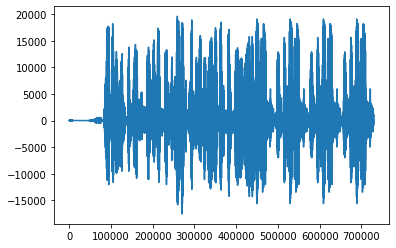

In [19]:
spf = wave.open('audio1.wav', 'r')

signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

plt.figure(1)
plt.plot(signal)
plt.show()

In [96]:
root[25].text

'я подумал что больше всего мне подходит'

In [7]:
def transcribe_gcs_with_word_time_offsets(gcs_uri):
    """Transcribe the given audio file asynchronously and output the word time
    offsets."""
    from google.cloud import speech

    client = speech.SpeechClient()

    audio = speech.RecognitionAudio(uri=gcs_uri)
    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.FLAC,
        sample_rate_hertz=16000,
        language_code="ru-RU",
        enable_word_time_offsets=True,
    )

    operation = client.long_running_recognize(config=config, audio=audio)

    print("Waiting for operation to complete...")
    result = operation.result(timeout=90)

    for result in result.results:
        alternative = result.alternatives[0]
        print("Transcript: {}".format(alternative.transcript))
        print("Confidence: {}".format(alternative.confidence))

        for word_info in alternative.words:
            word = word_info.word
            start_time = word_info.start_time
            end_time = word_info.end_time

            print(
                f"Word: {word}, start_time: {start_time.total_seconds()}, end_time: {end_time.total_seconds()}"
            )


In [8]:
transcribe_gcs_with_word_time_offsets('audio1.wav')

ModuleNotFoundError: No module named 'google.cloud'